# **EDA BY SAAD UR RAHMAN - CHARGING STATIONSS**

# **INITIAL PREPARATION**

In [128]:
#importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import statistics

#reading csv file
fresh_data = pd.read_csv("charging.csv")

In [22]:
#storing a caopy into another variable
df=fresh_data.copy()
df.head(4)

,Start Time,Meter Start (Wh),Meter End(Wh),Meter Total(Wh),Total Duration (s),Charger_name
0,24.08.2018 09:50,50,50.00,0.00,37,NaN
1,24.08.2018 09:51,50,50.00,0.00,38,NaN
2,24.08.2018 09:51,73,118.52,45.52,56,NaN
3,24.08.2018 09:53,105,116.66,11.66,76,NaN


In [23]:
#printing info and isnull to cheeck fron number of non null values, data types of columns and number of null values
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Start Time          277 non-null    object 
 1   Meter Start (Wh)    277 non-null    int64  
 2   Meter End(Wh)       277 non-null    float64
 3   Meter Total(Wh)     277 non-null    float64
 4   Total Duration (s)  277 non-null    int64  
 5   Charger_name        264 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 13.1+ KB
None
Start Time             0
Meter Start (Wh)       0
Meter End(Wh)          0
Meter Total(Wh)        0
Total Duration (s)     0
Charger_name          13
dtype: int64


In [24]:
#storing rowss with null values as seperate dataframe
null_values = df[df.isnull().any(axis=1)]
null_values

,Start Time,Meter Start (Wh),Meter End(Wh),Meter Total(Wh),Total Duration (s),Charger_name
0,24.08.2018 09:50,50,50.00,0.00,37,NaN
1,24.08.2018 09:51,50,50.00,0.00,38,NaN
2,24.08.2018 09:51,73,118.52,45.52,56,NaN
3,24.08.2018 09:53,105,116.66,11.66,76,NaN
4,24.08.2018 09:54,121,144.77,23.77,19,NaN
5,24.08.2018 09:54,132,132.00,0.00,18,NaN
6,27.08.2018 09:16,39,483.18,444.18,515,NaN
7,27.08.2018 09:24,507,547.25,40.25,48,NaN
8,27.08.2018 09:25,537,1551.37,1014.37,1052,NaN
80,20.11.2018 16:22,570518,574388.06,3870.06,53821,NaN


In [25]:
#dropping the null values from the main dataframe
df.dropna(inplace=True)
df.isnull().sum()

Start Time            0
Meter Start (Wh)      0
Meter End(Wh)         0
Meter Total(Wh)       0
Total Duration (s)    0
Charger_name          0
dtype: int64

In [26]:
#Finding rows with Meter Total(Wh) > 0 but total duration = 0, this means the charger can charger instantaniosly without time-loss, which is impossible
mask = (df['Total Duration (s)'] == 0) & (df['Meter Total(Wh)'] != 0)

#storing it in another dataframe
df_error = df[mask]
df_error

,Start Time,Meter Start (Wh),Meter End(Wh),Meter Total(Wh),Total Duration (s),Charger_name
9,29.08.2018 08:01,1546,2290.81,744.81,0,charger_3
10,29.08.2018 08:19,2433,2447.41,14.41,0,charger_3
11,29.08.2018 13:25,2441,18233.89,15792.89,0,charger_3
17,06.09.2018 07:27,5709,11062.20,5353.20,0,charger_2
18,06.09.2018 09:15,28619,31060.46,2441.46,0,charger_3
100,19.12.2018 10:55,622842,626820.04,3978.04,0,charger_5
117,02.04.2019 09:48,726247,727279.73,1032.73,0,charger_4
125,04.04.2019 10:27,675539,675826.10,287.10,0,charger_8
162,28.01.2019 01:11,873775,875702.62,1927.62,0,charger_4
164,02.05.2019 11:24,876263,876299.00,36.00,0,charger_4


In [27]:
#droppping the above rows from the main dataframe
df.drop(df_error.index, inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(242, 6)

In [28]:
#Checking whether the readings in 'Meter Total(Wh)' column equals 'Meter End(Wh)' - 'Meter Start (Wh)'
df[((df['Meter End(Wh)'] - df['Meter Start (Wh)']) - df['Meter Total(Wh)']) > 0.1]

,Start Time,Meter Start (Wh),Meter End(Wh),Meter Total(Wh),Total Duration (s),Charger_name


# **INITIAL EDA**

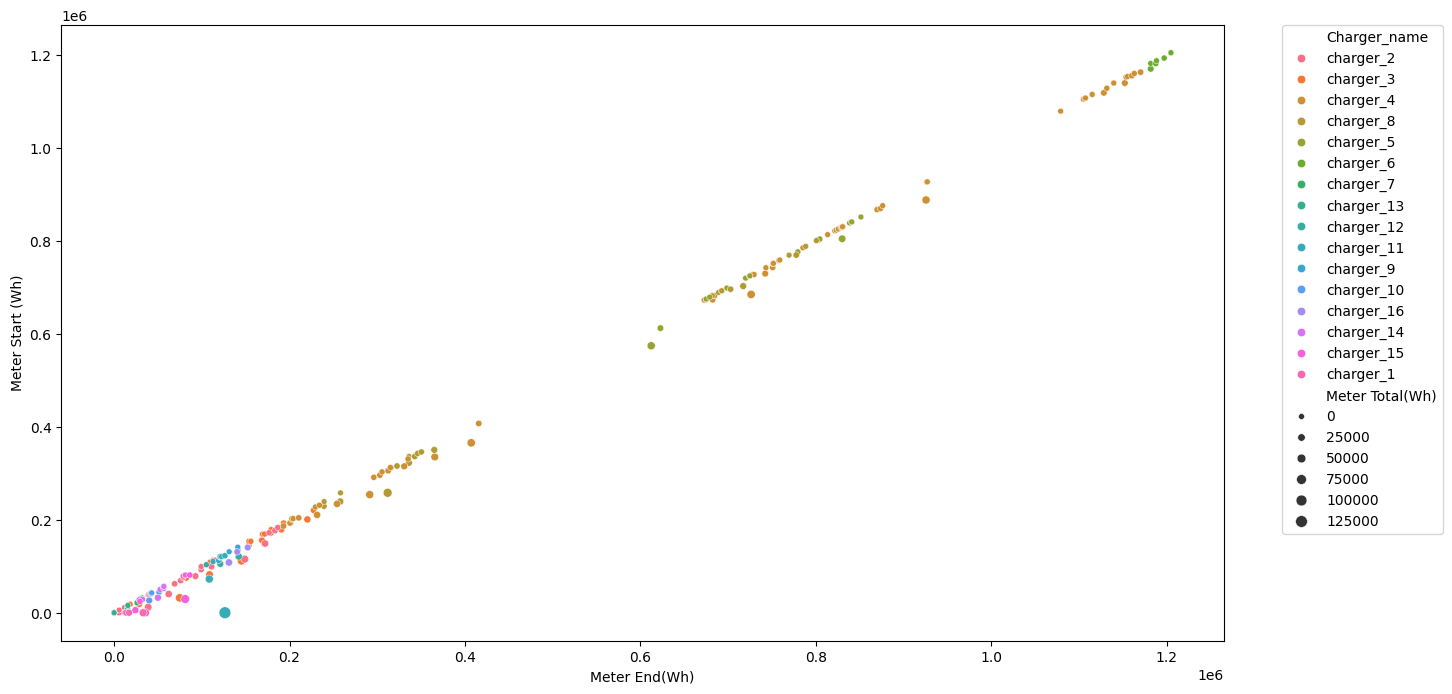

In [29]:
#plotting a scatter plot between 'Meter Start (Wh)' and 'Meter End(Wh)'
y = df['Meter Start (Wh)']
x = df['Meter End(Wh)']
plt.figure(figsize=(15,8))
sns.scatterplot(x=x, y=y, hue='Charger_name', size='Meter Total(Wh)', data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

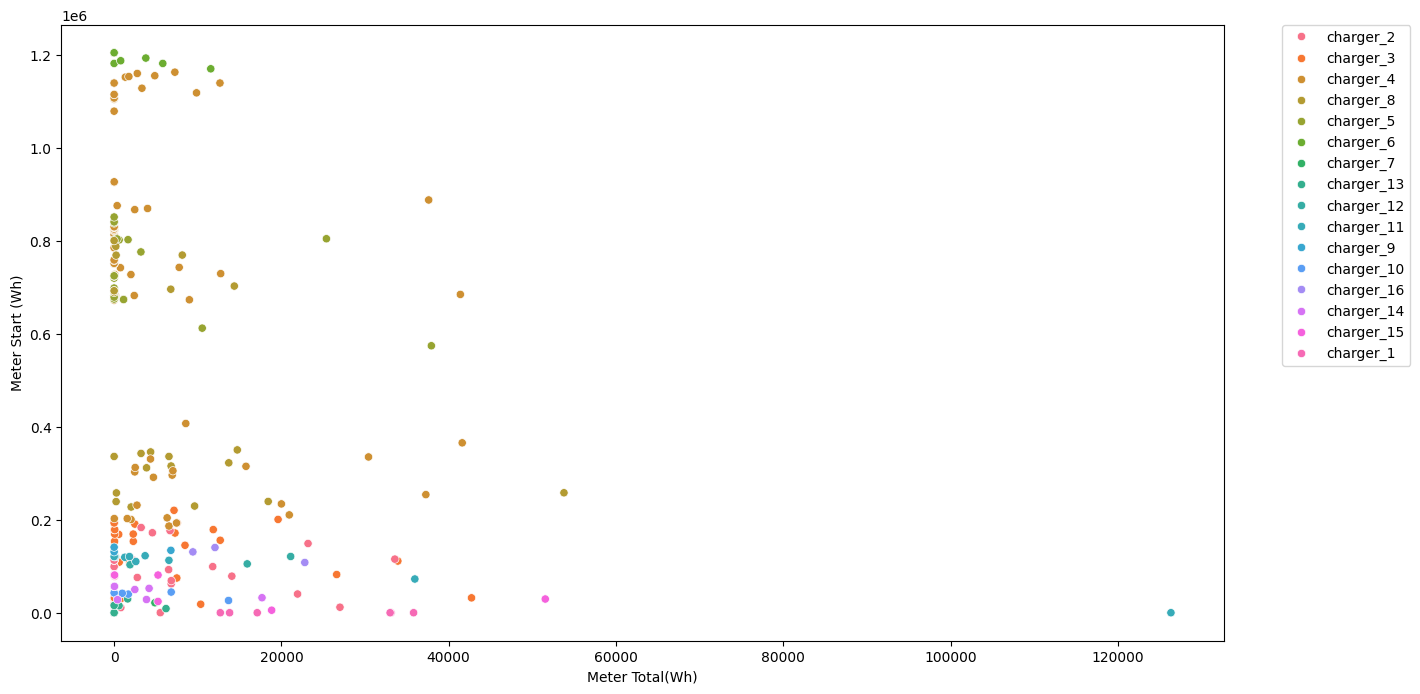

In [30]:
#plotting a scatter plot between 'Meter Start (Wh)' and 'Meter Total(Wh)'
y = df['Meter Start (Wh)']
x = df['Meter Total(Wh)']
plt.figure(figsize=(15,8))
sns.scatterplot(x=x, y=y, hue='Charger_name', data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

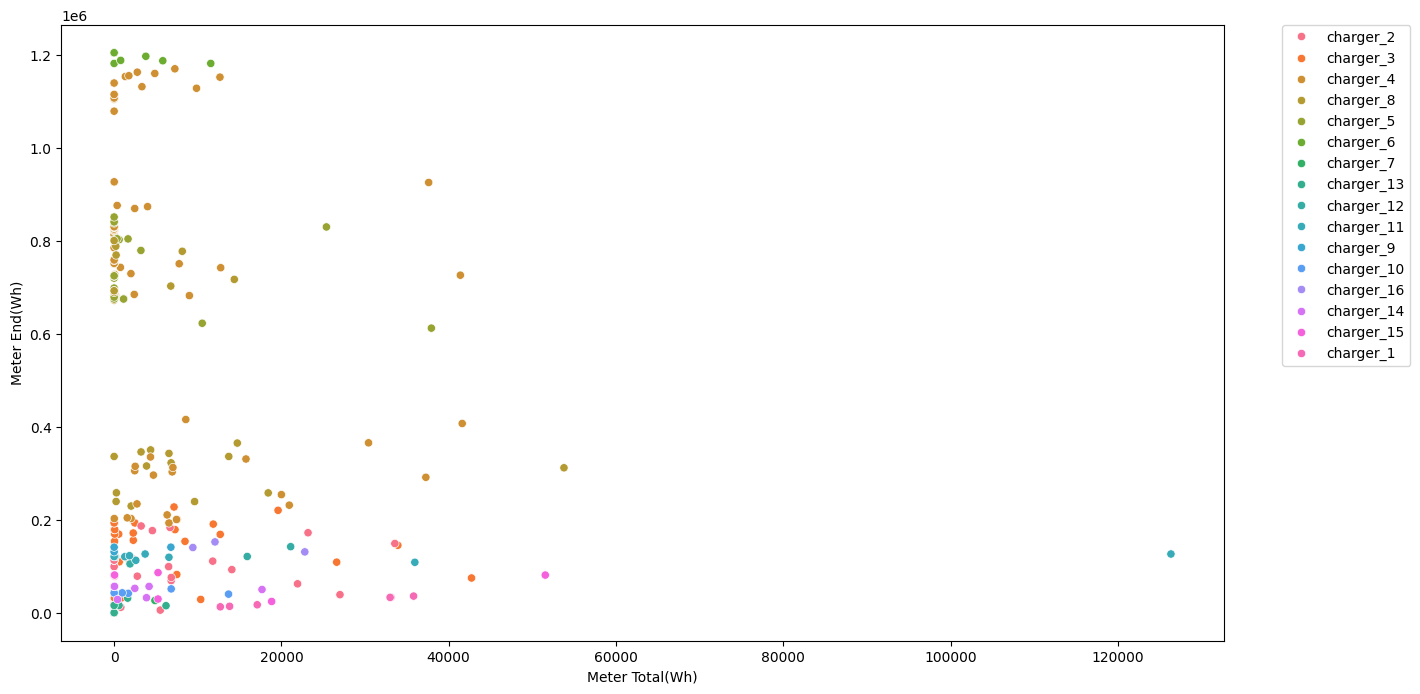

In [31]:
#plotting a scatter plot between 'Meter End(Wh)' and 'Meter Total(Wh)'
y = df['Meter End(Wh)']
x = df['Meter Total(Wh)']
plt.figure(figsize=(15,8))
sns.scatterplot(x=x, y=y, hue='Charger_name', data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

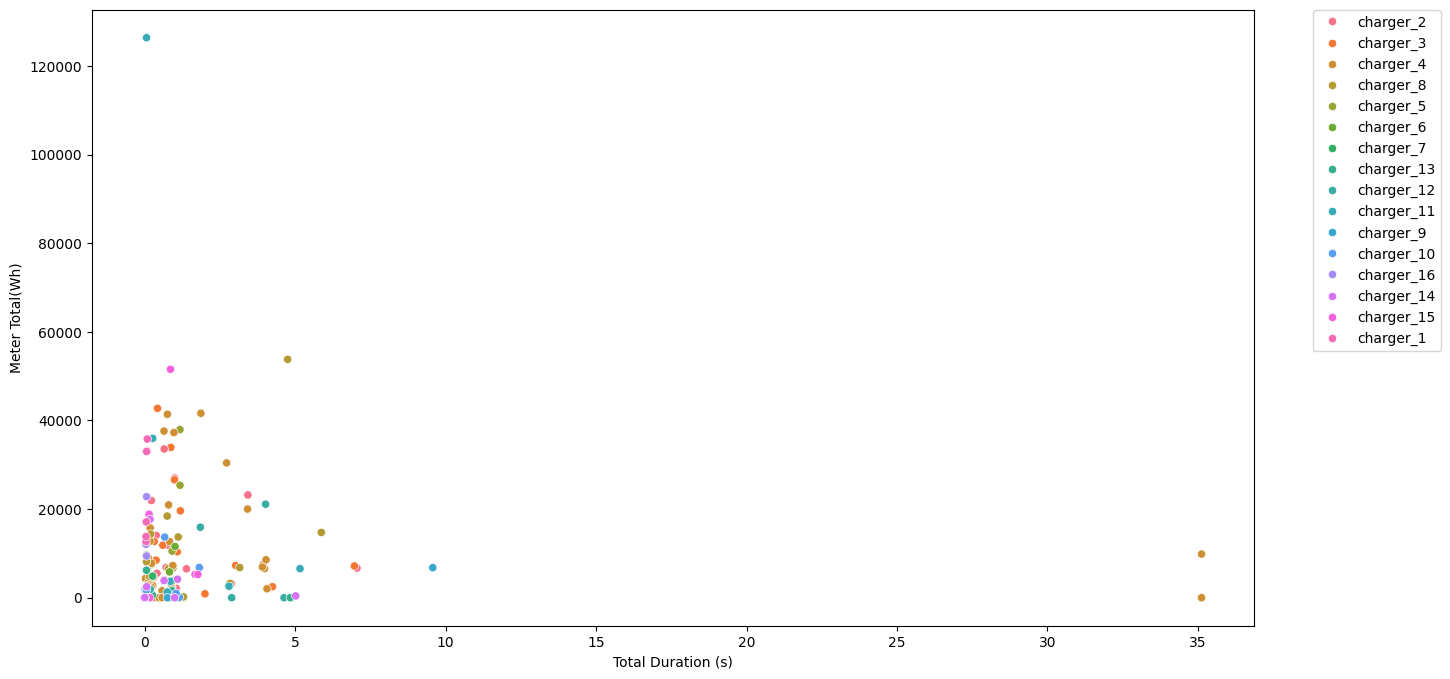

In [32]:
#plotting a scatter plot between 'Meter Total(Wh)' and 'Total Duration (s)'
y = df['Meter Total(Wh)']
x = df['Total Duration (s)']/86000
plt.figure(figsize=(15,8))
sns.scatterplot(x=x, y=y, hue='Charger_name', data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# **DEALING WITH FAULTY VALUES - OUTLIERS, MISCALCULATIONS**

In [33]:
#printing the rows with outliers in Meter Total(Wh) column
df.nlargest(5, columns=['Meter Total(Wh)'])

,Start Time,Meter Start (Wh),Meter End(Wh),Meter Total(Wh),Total Duration (s),Charger_name
208,02.07.2019 12:32,0,126350.92,126350.92,5140,charger_11
69,21.11.2018 13:49,258070,311852.76,53782.76,408432,charger_8
227,20.08.2019 12:33,29490,81038.36,51548.36,73515,charger_15
16,13.09.2018 06:50,31998,74728.01,42730.01,36371,charger_3
91,08.01.2019 13:46,365541,407157.10,41616.10,160428,charger_4


In [34]:
#printing the rows with outliers in Total Duration (s) column
df.nlargest(5, columns=['Total Duration (s)'])

,Start Time,Meter Start (Wh),Meter End(Wh),Meter Total(Wh),Total Duration (s),Charger_name
149,19.01.2019 09:49,802656,802674.80,18.80,3020411,charger_5
167,12.01.2019 05:12,1118605,1128457.09,9852.09,3020397,charger_4
169,08.01.2019 13:01,1139700,1139700.00,0.00,3020396,charger_4
215,16.09.2019 17:59,134241,141026.63,6785.63,823282,charger_9
55,23.10.2018 10:22,176675,183361.57,6686.57,606595,charger_2


In [35]:
#Dropping the outliers from the dataframe
df.drop(df.nlargest(1, columns=['Meter Total(Wh)']).index, inplace=True)
df.drop(df.nlargest(3, columns=['Total Duration (s)']).index, inplace=True)

#resetting the index
df.reset_index(drop=True, inplace=True)
df.shape

(238, 6)

In [37]:
#Copying main dataframe for some extra calculations
df_try = df.copy()

#Finding rows with Meter Total(Wh) == 0, these are rows whose values won't be used to calculate speed of charger
#I am assuming that zero charging means that the charger and car were not compatible, or there was some fault with the METER of the charger
zero_charging = df_try[df_try['Meter Total(Wh)'] == 0]

#droppping the above rows from the new dataframe
df_try.drop(zero_charging.index, inplace=True)
df_try.reset_index(drop=True, inplace=True)
df_try.shape

(164, 6)

In [39]:
#Calculating speed of charging for eact instance
df_try['Meter Speed'] = df_try['Meter Total(Wh)']/df_try['Total Duration (s)']

#reseting index
df_try.reset_index(drop=True, inplace=True)
df_try

,Start Time,Meter Start (Wh),Meter End(Wh),Meter Total(Wh),Total Duration (s),Charger_name,Meter Speed
0,31.08.2018 06:45,138,5659.07,5521.07,35155,charger_2,0.157049
1,31.08.2018 09:37,18220,18281.96,61.96,206,charger_3,0.300777
2,03.09.2018 07:25,18263,28615.15,10352.15,92823,charger_3,0.111526
3,06.09.2018 06:33,5660,5729.99,69.99,2939,charger_2,0.023814
4,07.09.2018 11:11,11044,11844.25,800.25,2808,charger_2,0.284989
...,...,...,...,...,...,...,...
159,09.09.2019 05:47,0,33101.51,33101.51,6906,charger_1,4.793152
160,11.09.2019 14:05,0,13807.38,13807.38,3726,charger_1,3.705684
161,12.09.2019 11:05,0,35804.92,35804.92,7234,charger_1,4.949533
162,16.09.2019 07:17,0,32996.70,32996.70,5240,charger_1,6.297080


In [40]:
# Grouping by 'Charger_name' and then calculating the mean speed for each charger
df_speed = df_try.groupby('Charger_name')['Meter Speed'].mean().reset_index(name='Mean Speed')
df_speed

,Charger_name,Mean Speed
0,charger_1,4.536362
1,charger_10,0.133137
2,charger_11,0.657123
3,charger_12,0.094365
4,charger_13,0.438932
5,charger_14,0.486433
6,charger_15,0.662472
7,charger_16,3.183504
8,charger_2,0.370889
9,charger_3,0.251320


In [42]:
#Joining error and speed dataframe in 'Charger Name'
merged_df = pd.merge(df_error, df_speed, on='Charger_name')

#Calculating the 'Total Duration (s)' for each instance to replace the wrong value
for index, row in merged_df.iterrows():
    merged_df.loc[index, 'Total Duration (s)'] = row['Meter Total(Wh)'] / row['Mean Speed']

#Stroring the required columns in new dataframe
df_error_corrected = merged_df[['Start Time', 'Meter Start (Wh)','Meter End(Wh)','Meter Total(Wh)','Total Duration (s)','Charger_name']]
df_error_corrected

,Start Time,Meter Start (Wh),Meter End(Wh),Meter Total(Wh),Total Duration (s),Charger_name
0,29.08.2018 08:01,1546,2290.81,744.81,2963.592915,charger_3
1,29.08.2018 08:19,2433,2447.41,14.41,57.337272,charger_3
2,29.08.2018 13:25,2441,18233.89,15792.89,62839.780501,charger_3
3,06.09.2018 09:15,28619,31060.46,2441.46,9714.549427,charger_3
4,06.09.2018 07:27,5709,11062.20,5353.20,14433.441574,charger_2
5,19.12.2018 10:55,622842,626820.04,3978.04,13543.732225,charger_5
6,02.04.2019 09:48,726247,727279.73,1032.73,2877.240875,charger_4
7,28.01.2019 01:11,873775,875702.62,1927.62,5370.452156,charger_4
8,02.05.2019 11:24,876263,876299.00,36.00,100.297921,charger_4
9,08.01.2019 13:50,876296,876346.55,50.55,140.834997,charger_4


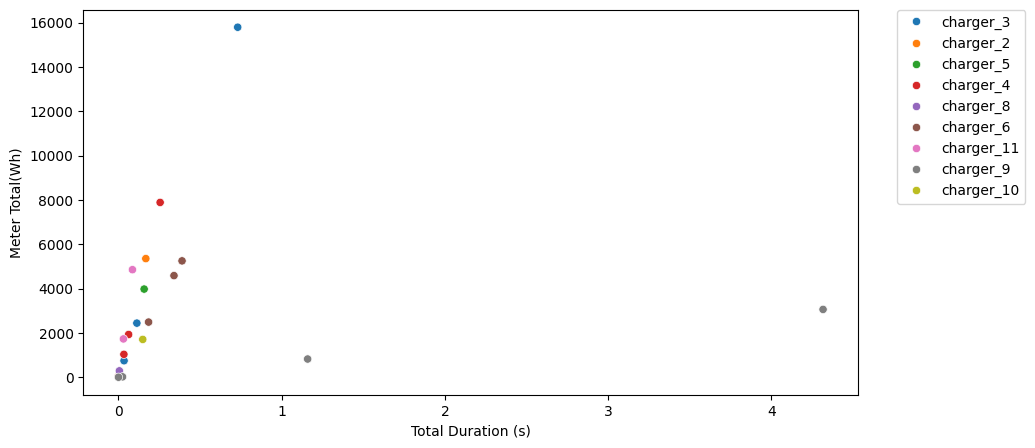

In [46]:
#plotting a scatter plot between 'Meter Total(Wh)' and 'Total Duration (s)' to check for outliers
y = df_error_corrected['Meter Total(Wh)']
x = df_error_corrected['Total Duration (s)']/86000
plt.figure(figsize=(10,5))
sns.scatterplot(x=x, y=y, hue='Charger_name', data=df_error_corrected)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [55]:
#Concatinating main and corrected datafamres
df = pd.concat([df, df_error_corrected], ignore_index=True)

# Display the updated dataframe and check is everthing is alright
print(df.info())
print('\n')
print(df.isnull().sum())
print('\n')
print(df.shape)
print('\n')
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Start Time          260 non-null    object 
 1   Meter Start (Wh)    260 non-null    int64  
 2   Meter End(Wh)       260 non-null    float64
 3   Meter Total(Wh)     260 non-null    float64
 4   Total Duration (s)  260 non-null    float64
 5   Charger_name        260 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 12.3+ KB
None


Start Time            0
Meter Start (Wh)      0
Meter End(Wh)         0
Meter Total(Wh)       0
Total Duration (s)    0
Charger_name          0
dtype: int64


(260, 6)




,Start Time,Meter Start (Wh),Meter End(Wh),Meter Total(Wh),Total Duration (s),Charger_name
0,31.08.2018 06:45,138,5659.07,5521.07,35155.0,charger_2
1,31.08.2018 09:37,18220,18281.96,61.96,206.0,charger_3
2,31.08.2018 09:41,18263,18263.00,0.00,55.0,charger_3
3,03.09.2018 07:25,18263,28615.15,10352.15,92823.0,charger_3
4,06.09.2018 06:33,5660,5729.99,69.99,2939.0,charger_2


# **ADJUSTING THE TIMESTAMP DATA FOR BETTER USE**

In [56]:
#creating a function to split date-time into smaller parts
def split_datetime(start_time):
  """
  This function takes a string in the format "31.08.2018 06:45" and returns a dictionary containing the date, year, month, day, time, and year_month as separate values.
  """
  # Splitting the string into date and time parts
  date_time = start_time.split()

  # Splitting the date part into day, month, and year
  date_parts = date_time[0].split('.')

  # Converting the date parts to integers
  day = int(date_parts[0])
  month = int(date_parts[1])
  year = int(date_parts[2])

  # Splitting the time part into hours and minutes
  time_parts = date_time[1].split(':')

  # Converting the time parts to integers
  hour = int(time_parts[0])
  minute = int(time_parts[1])

  # Creating a dictionary to store the results
  result = {
    'date': date_time[0],
    'year': year,
    'month': month,
    'day': day,
    'time': date_time[1],
    'hour': hour,
    'minute': minute,
    'year_month': str(year) + '-' + str(month)
  }

  return result

In [57]:
#Storing the returned dictionary into new columns
df[['date', 'year', 'month', 'day', 'time', 'hour', 'minute', 'year_month']] = df['Start Time'].apply(split_datetime).apply(pd.Series)

#displaing first 5 rows
df.head(5)

,Start Time,Meter Start (Wh),Meter End(Wh),Meter Total(Wh),Total Duration (s),Charger_name,date,year,month,day,time,hour,minute,year_month
0,31.08.2018 06:45,138,5659.07,5521.07,35155.0,charger_2,31.08.2018,2018,8,31,06:45,6,45,2018-8
1,31.08.2018 09:37,18220,18281.96,61.96,206.0,charger_3,31.08.2018,2018,8,31,09:37,9,37,2018-8
2,31.08.2018 09:41,18263,18263.00,0.00,55.0,charger_3,31.08.2018,2018,8,31,09:41,9,41,2018-8
3,03.09.2018 07:25,18263,28615.15,10352.15,92823.0,charger_3,03.09.2018,2018,9,3,07:25,7,25,2018-9
4,06.09.2018 06:33,5660,5729.99,69.99,2939.0,charger_2,06.09.2018,2018,9,6,06:33,6,33,2018-9


In [58]:
#sorting values based time and date in ascending order
df= df.sort_values(by=['year','month','date','hour','minute'], ascending=True)
df.reset_index(drop=True, inplace=True)
df.head(5)

,Start Time,Meter Start (Wh),Meter End(Wh),Meter Total(Wh),Total Duration (s),Charger_name,date,year,month,day,time,hour,minute,year_month
0,29.08.2018 08:01,1546,2290.81,744.81,2963.592915,charger_3,29.08.2018,2018,8,29,08:01,8,1,2018-8
1,29.08.2018 08:19,2433,2447.41,14.41,57.337272,charger_3,29.08.2018,2018,8,29,08:19,8,19,2018-8
2,29.08.2018 13:25,2441,18233.89,15792.89,62839.780501,charger_3,29.08.2018,2018,8,29,13:25,13,25,2018-8
3,31.08.2018 06:45,138,5659.07,5521.07,35155.000000,charger_2,31.08.2018,2018,8,31,06:45,6,45,2018-8
4,31.08.2018 09:37,18220,18281.96,61.96,206.000000,charger_3,31.08.2018,2018,8,31,09:37,9,37,2018-8


# **SOME STATISTICAL DATA SUCH AS COUNT, MEAN, MAX, MIN, STD**

In [59]:
df.nunique()

Start Time            252
Meter Start (Wh)      225
Meter End(Wh)         249
Meter Total(Wh)       187
Total Duration (s)    211
Charger_name           16
date                  117
year                    2
month                  11
day                    31
time                  214
hour                   21
minute                 60
year_month             13
dtype: int64

In [61]:
#storing a copy of dataframe as df_adj
df_adj=df.copy()

#converting Watts to KiloWatts and seconds into hours, these are considered standard unit in the industry
df_adj[['Meter Total(Wh)','Meter Start (Wh)','Meter End(Wh)']] = df_adj[['Meter Total(Wh)','Meter Start (Wh)','Meter End(Wh)']]/1000
df_adj['Total Duration (s)'] = df_adj['Total Duration (s)']/3600

In [62]:
df_adj[['Meter Start (Wh)','Meter End(Wh)','Meter Total(Wh)','Total Duration (s)']].describe()

,Meter Start (Wh),Meter End(Wh),Meter Total(Wh),Total Duration (s)
count,260.000000,260.000000,260.000000,260.000000
mean,408.864285,414.793284,5.928999,17.419325
std,387.566458,385.672616,10.037078,32.942623
min,0.000000,0.000000,0.000000,0.000000
25%,81.072500,97.590553,0.000000,0.036111
50%,203.377000,215.415745,1.682860,2.738826
75%,751.044250,751.044250,6.825728,20.535764
max,1204.911000,1204.934590,53.782760,228.689444


In [181]:
df_adj[['Meter Start (Wh)','Meter End(Wh)','Meter Total(Wh)','Total Duration (s)']].median()

Meter Start (Wh)      203.377000
Meter End(Wh)         215.415745
Meter Total(Wh)         1.682860
Total Duration (s)      2.738826
dtype: float64

# **EDA BASED ON CHARGER NAMES**

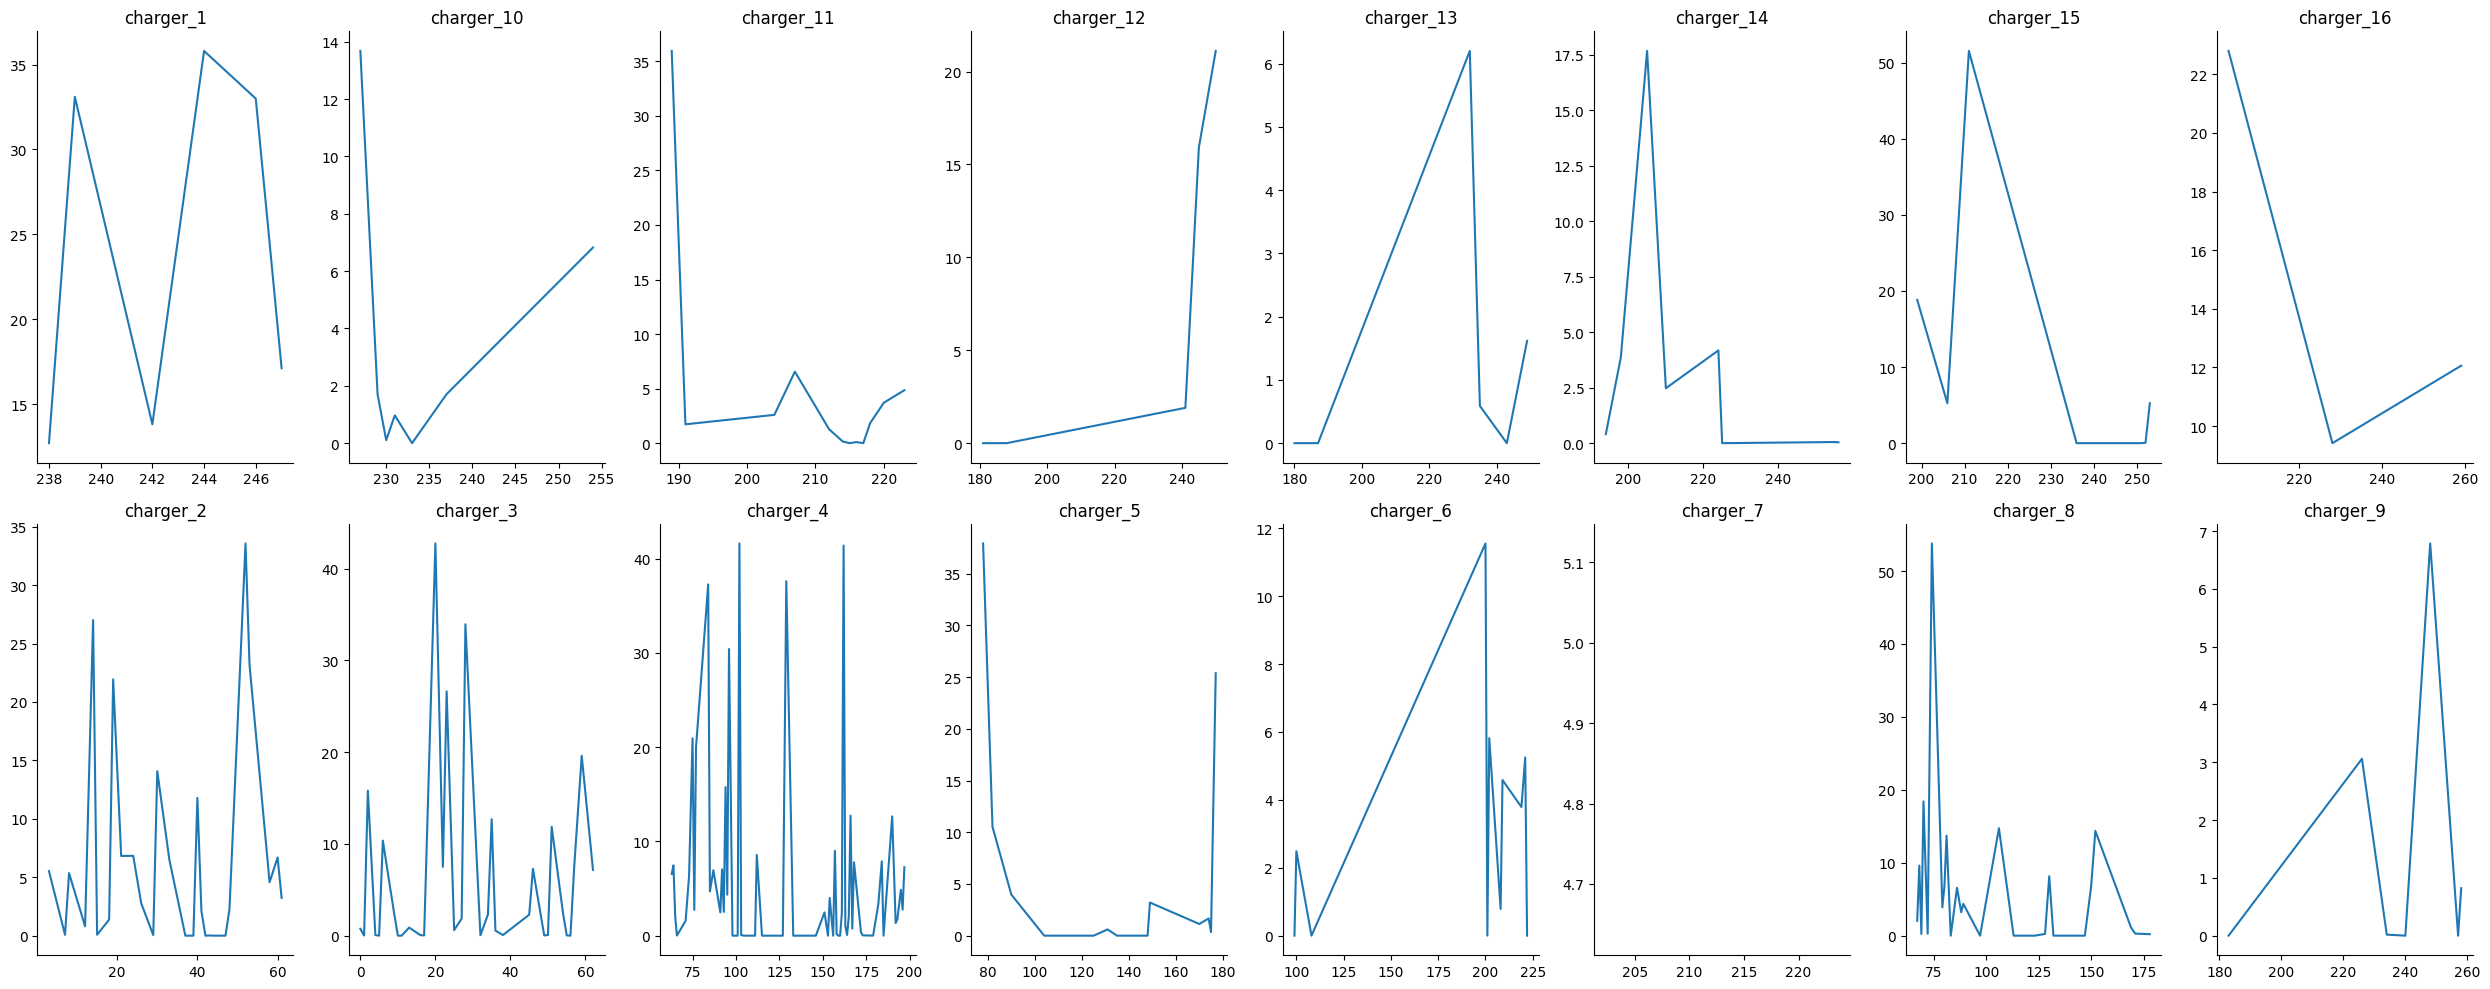

In [180]:
# Groupping the data by 'Charger_name'
grouped_data = df_adj.groupby('Charger_name')

# Creating a figure with 8 columns and 2 rows
fig, axes = plt.subplots(nrows=2, ncols=8, figsize=(25, 10))

# Plotting a line plot for 'Meter Start (Wh)' for each group
for i, (name, group) in enumerate(grouped_data):
    ax = axes[i // 8, i % 8]  # Select the appropriate subplot
    group['Meter Total(Wh)'].plot(kind='line', ax=ax, title=name)
    ax.spines[['top', 'right']].set_visible(False)

# Adjusting the spacing between subplots
plt.tight_layout()

# Displaying the plot
plt.show()

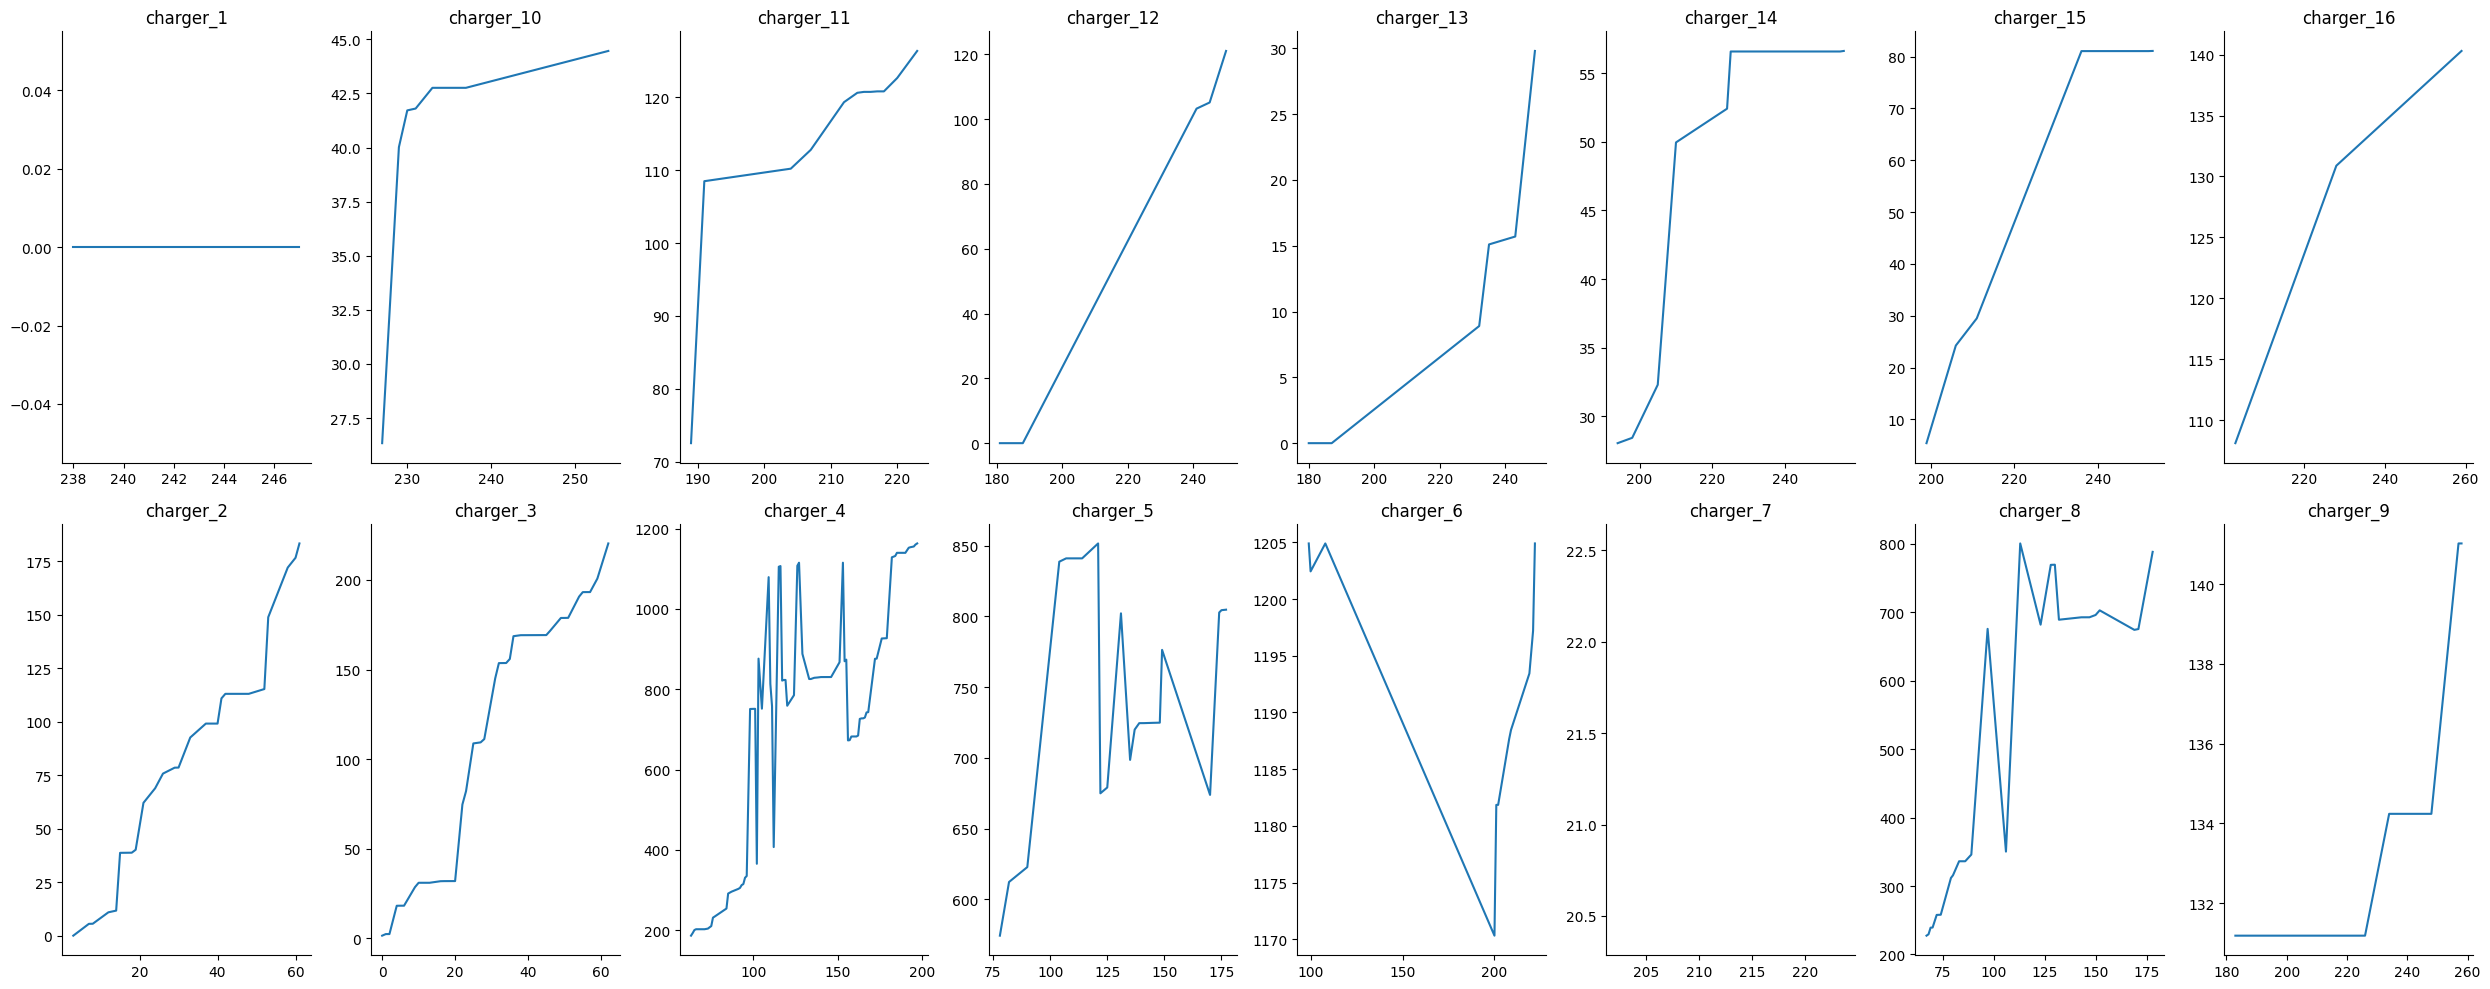

In [64]:
# Groupping the data by 'Charger_name'
grouped_data = df_adj.groupby('Charger_name')

# Creating a figure with 8 columns and 2 rows
fig, axes = plt.subplots(nrows=2, ncols=8, figsize=(25, 10))

# Plotting a line plot for 'Meter Start (Wh)' for each group
for i, (name, group) in enumerate(grouped_data):
    ax = axes[i // 8, i % 8]  # Select the appropriate subplot
    group['Meter Start (Wh)'].plot(kind='line', ax=ax, title=name)
    ax.spines[['top', 'right']].set_visible(False)

# Adjusting the spacing between subplots
plt.tight_layout()

# Displaying the plot
plt.show()

In [65]:
#Calculating speed for every instance
df_adj['Meter Speed'] = df_adj['Meter Total(Wh)']/df_adj['Total Duration (s)']
df_adj.head(5)

,Start Time,Meter Start (Wh),Meter End(Wh),Meter Total(Wh),Total Duration (s),Charger_name,date,year,month,day,time,hour,minute,year_month,Meter Speed
0,29.08.2018 08:01,1.546,2.29081,0.74481,0.823220,charger_3,29.08.2018,2018,8,29,08:01,8,1,2018-8,0.904752
1,29.08.2018 08:19,2.433,2.44741,0.01441,0.015927,charger_3,29.08.2018,2018,8,29,08:19,8,19,2018-8,0.904752
2,29.08.2018 13:25,2.441,18.23389,15.79289,17.455495,charger_3,29.08.2018,2018,8,29,13:25,13,25,2018-8,0.904752
3,31.08.2018 06:45,0.138,5.65907,5.52107,9.765278,charger_2,31.08.2018,2018,8,31,06:45,6,45,2018-8,0.565378
4,31.08.2018 09:37,18.220,18.28196,0.06196,0.057222,charger_3,31.08.2018,2018,8,31,09:37,9,37,2018-8,1.082796


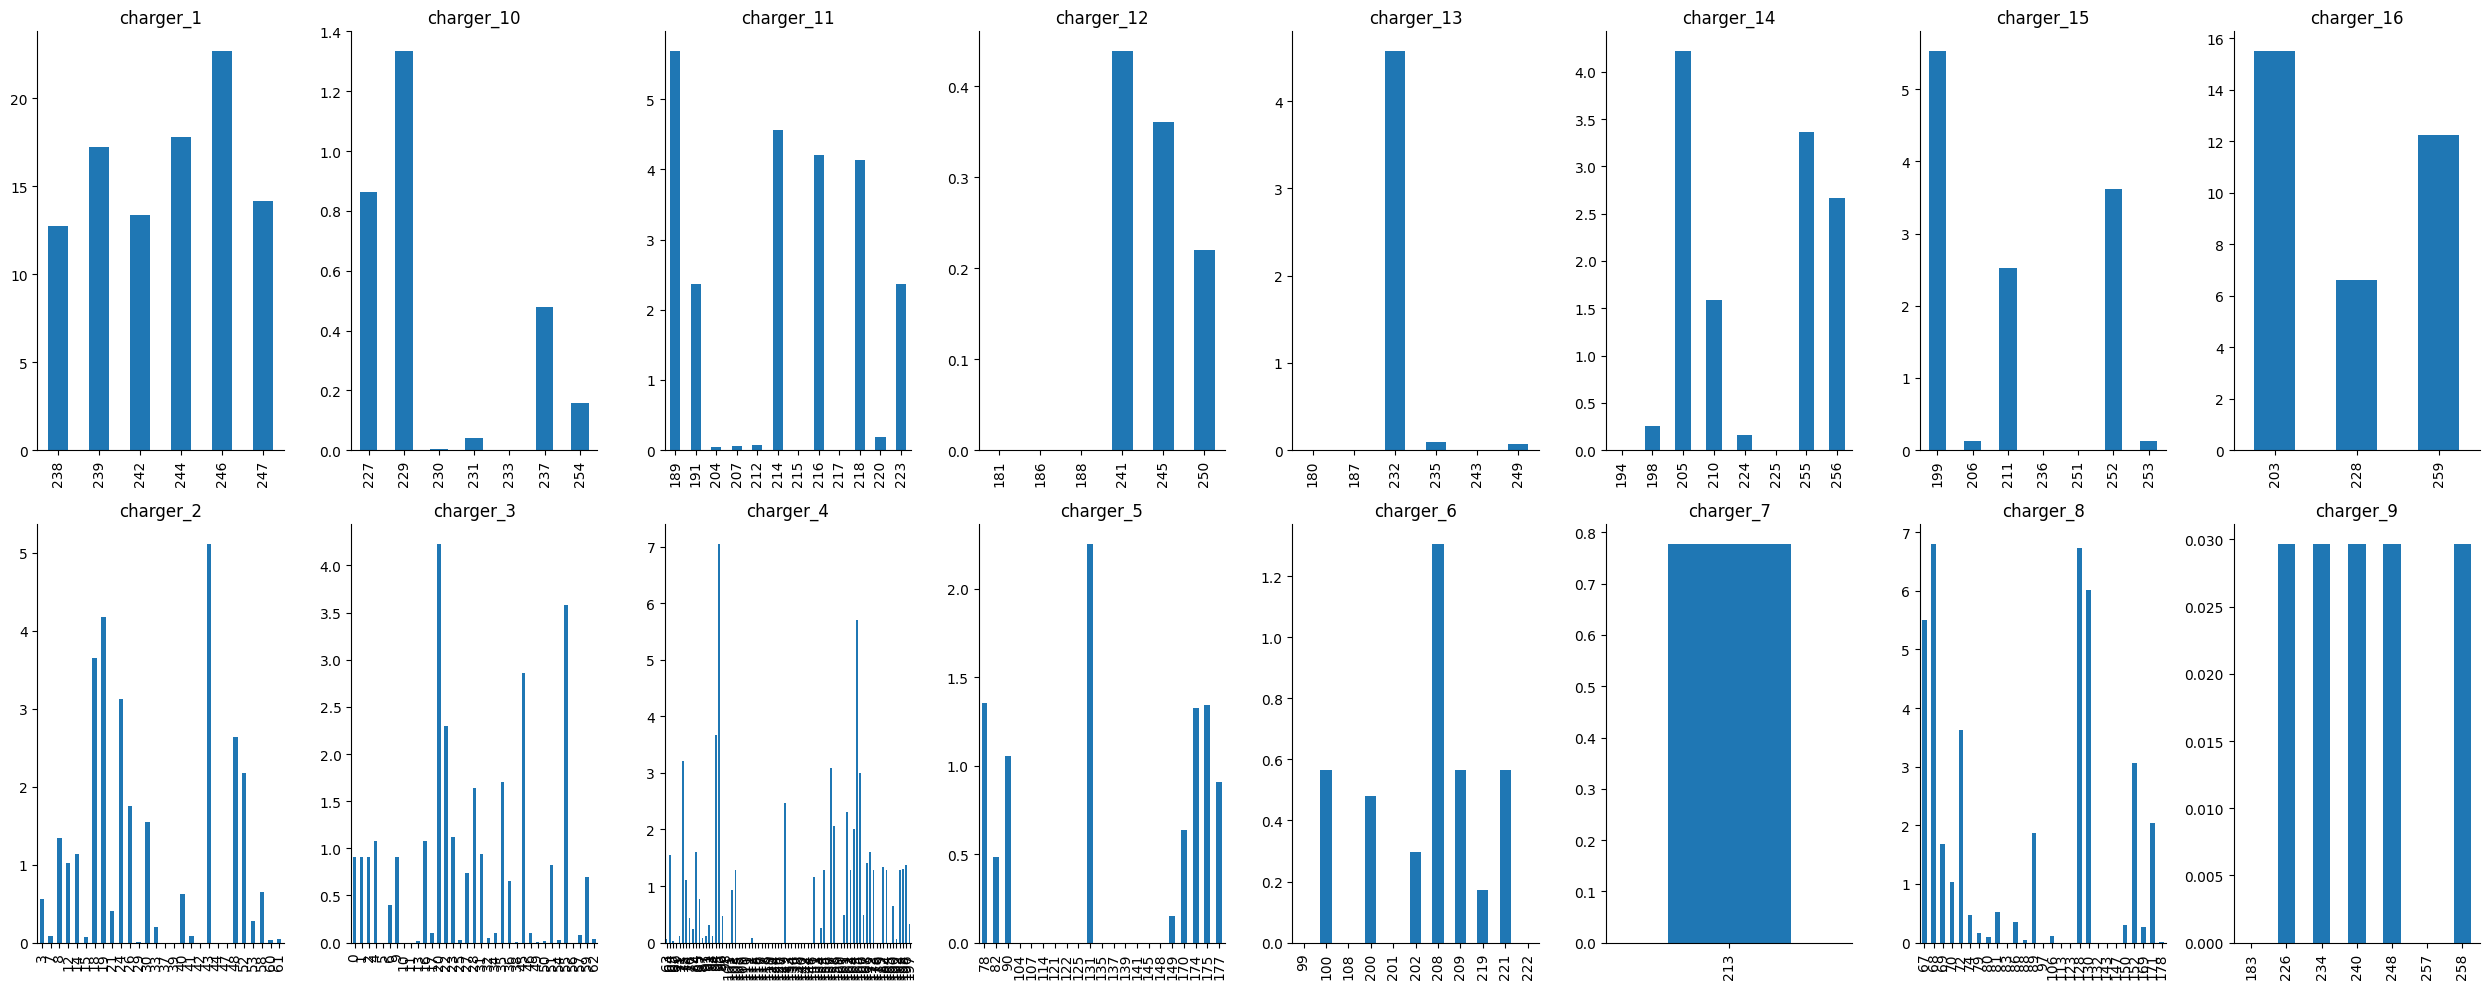

In [66]:
# Groupping the data by 'Charger_name'
grouped_data = df_adj.groupby('Charger_name')

# Creating a figure with 8 columns and 2 rows
fig, axes = plt.subplots(nrows=2, ncols=8, figsize=(25, 10))

# Plot a line plot for 'Meter Start (Wh)' for each group
for i, (name, group) in enumerate(grouped_data):
    ax = axes[i // 8, i % 8]  # Select the appropriate subplot
    group['Meter Speed'].plot(kind='bar', ax=ax, title=name)
    ax.spines[['top', 'right']].set_visible(False)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

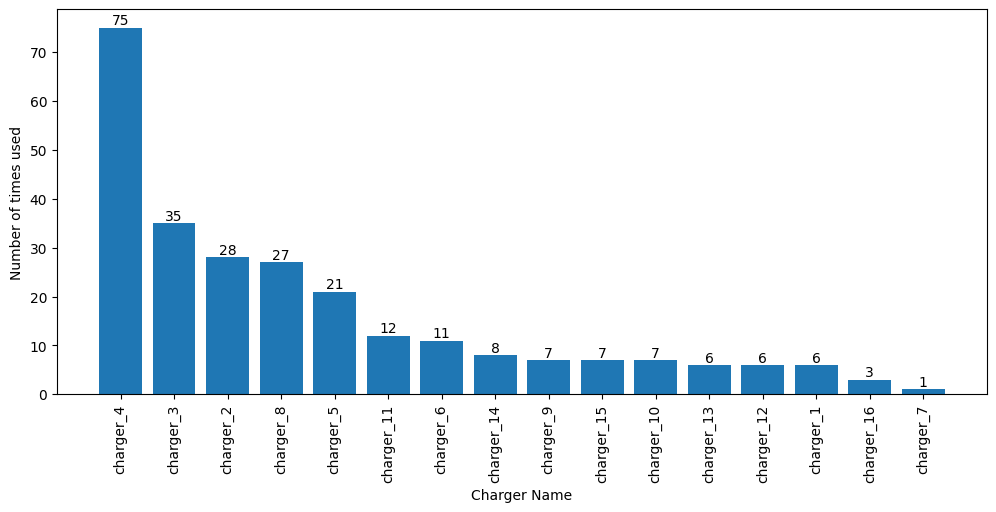

In [83]:
#Plotting number of times each charger was used
y = df_adj['Charger_name'].value_counts()
x = df_adj['Charger_name'].value_counts().index
plt.figure( figsize=(12,5))
plt.bar(x,y)
plt.xticks(rotation=90)

#Setting labels
plt.xlabel('Charger Name')
plt.ylabel('Number of times used')

# Adding the number of chargers above each bar
for i, v in enumerate(y):
    plt.text(i, v, str(v), ha='center', va='bottom')

#plotting
plt.show()

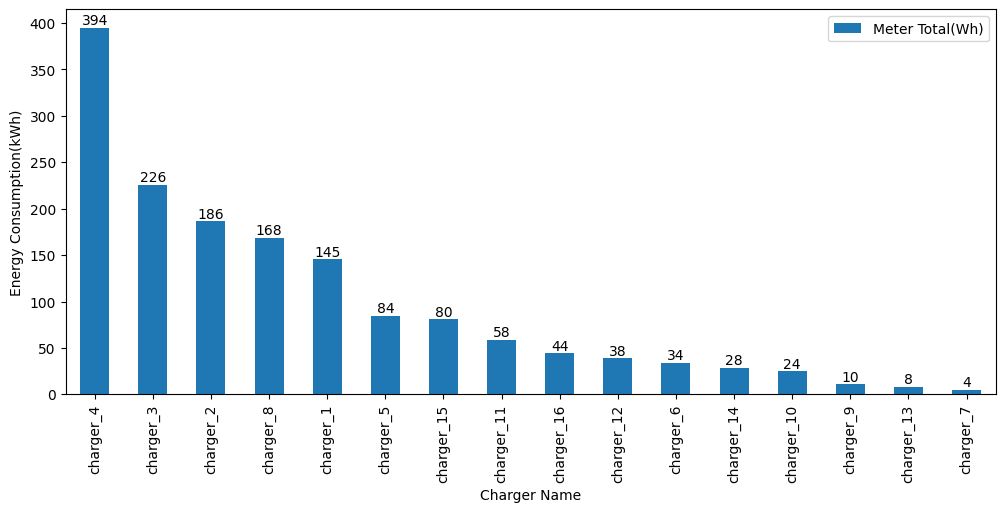

In [140]:
#Grouping by charger name to calculate total KWh consumption of each charger
df_grouped = df_adj.groupby('Charger_name')['Meter Total(Wh)'].sum().reset_index()
df_grouped = df_grouped.sort_values(by='Meter Total(Wh)', ascending=False)
df_grouped.plot(kind='bar',  figsize=(12,5), x='Charger_name', y='Meter Total(Wh)')

# Adding the number of chargers above each bar
for i, v in enumerate(df_grouped['Meter Total(Wh)']):
    plt.text(i, v, str(int(v)), ha='center', va='bottom')

#Setting labels
plt.xlabel('Charger Name')
plt.ylabel('Energy Consumption(kWh)')
plt.show()

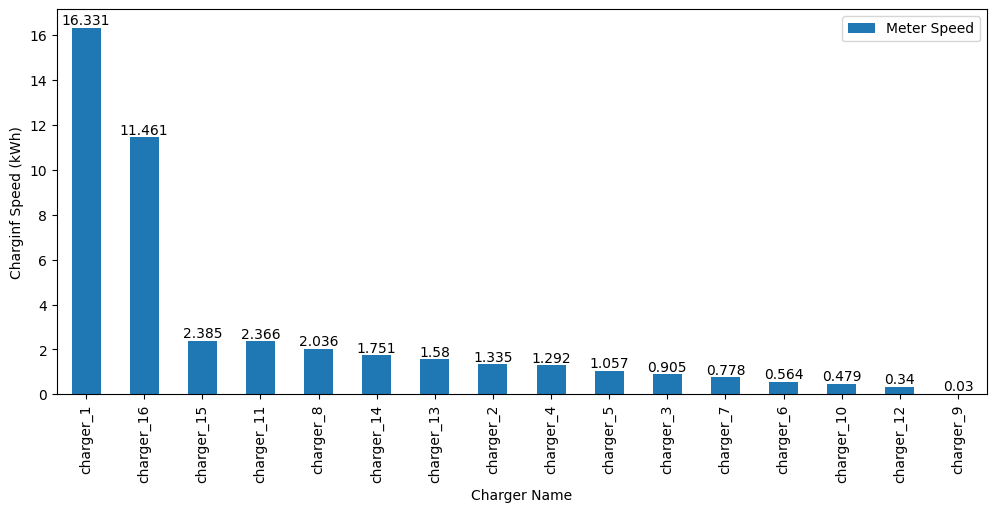

In [141]:
# Grouping by 'hour' and count the number of instances
df_temp = df_adj.copy()

#dropping rows with null values, Meter Total and Duration both are 0
df_temp.dropna(inplace=True)

#I am assuming that zero charging means that the charger and car were not compatible, or there was some fault with the METER of the charger
zero_charging = df_temp[df_temp['Meter Total(Wh)'] == 0]

#droppping the above rows from the new dataframe
df_temp.drop(zero_charging.index, inplace=True)
df_temp.reset_index(drop=True, inplace=True)

#Grouping by charger name to calculate total KWh consumption of each charger
df_grouped = df_temp.groupby('Charger_name')['Meter Speed'].mean().reset_index()
df_grouped = df_grouped.sort_values(by='Meter Speed', ascending=False)
df_grouped.plot(kind='bar',  figsize=(12,5), x='Charger_name', y='Meter Speed')

# Add the number of chargers above each bar
for i, v in enumerate(df_grouped['Meter Speed']):
    plt.text(i, v, str(round(v, 3)), ha='center', va='bottom')

#Adding labels
plt.xlabel('Charger Name')
plt.ylabel('Charginf Speed (kWh)')
plt.show()

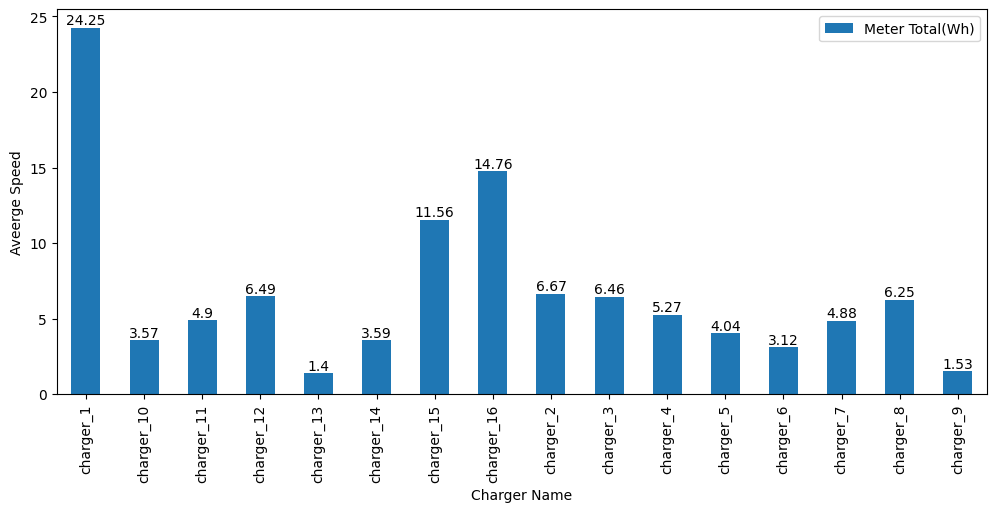

In [96]:
#Grouping by charger name to calculate average Speed of each charger per session
df_grouped = df_adj.groupby('Charger_name')['Meter Total(Wh)'].mean().reset_index()
df_grouped.plot(kind='bar', figsize=(12,5), x='Charger_name', y='Meter Total(Wh)')

# Adding the number of chargers above each bar
for i, v in enumerate(df_grouped['Meter Total(Wh)']):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')

#Adding labels
plt.xlabel('Charger Name')
plt.ylabel('Aveerge Speed')
plt.show()

# **TEMPORAL DATA EXPLORATION**

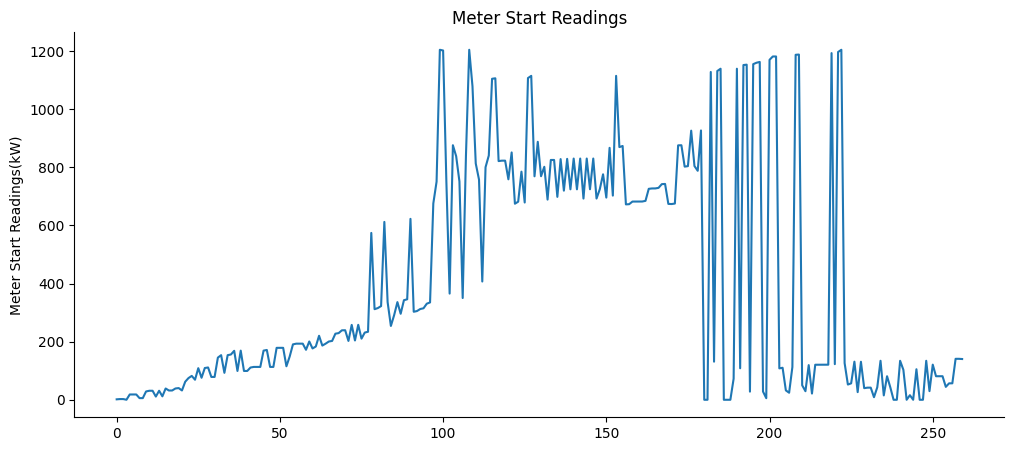

In [143]:
#Plotting Meter Start for each instance
df_adj['Meter Start (Wh)'].plot(kind='line', figsize=(12, 5), title='Meter Start Readings')
plt.gca().spines[['top', 'right']].set_visible(False)

#Adding Label
plt.gca().set_ylabel('Meter Start Readings(kW)')

#plotting
plt.show()

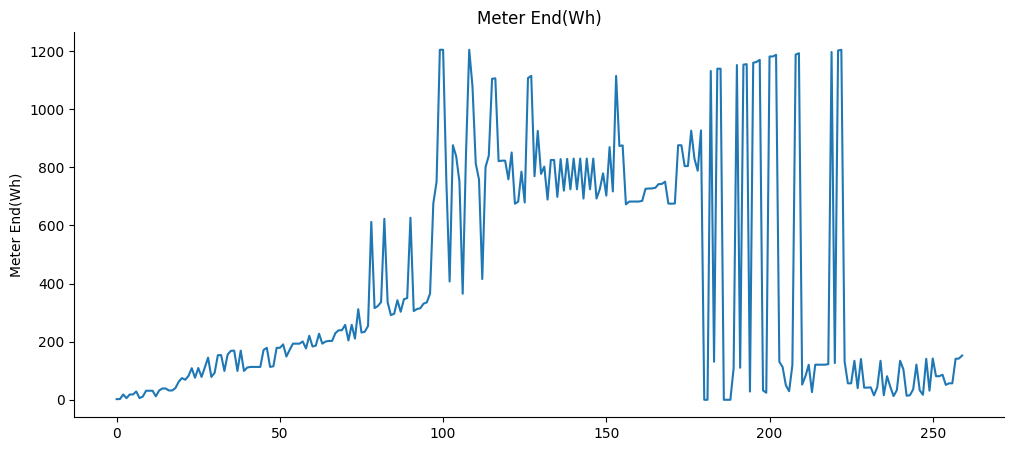

In [98]:
#Plotting Meter End for each instance
df_adj['Meter End(Wh)'].plot(kind='line', figsize=(12,5), title='Meter End Readings')
plt.gca().spines[['top', 'right']].set_visible(False)

#Adding Label
plt.gca().set_ylabel('Meter End Readings(kW)')

#plotting
plt.show()

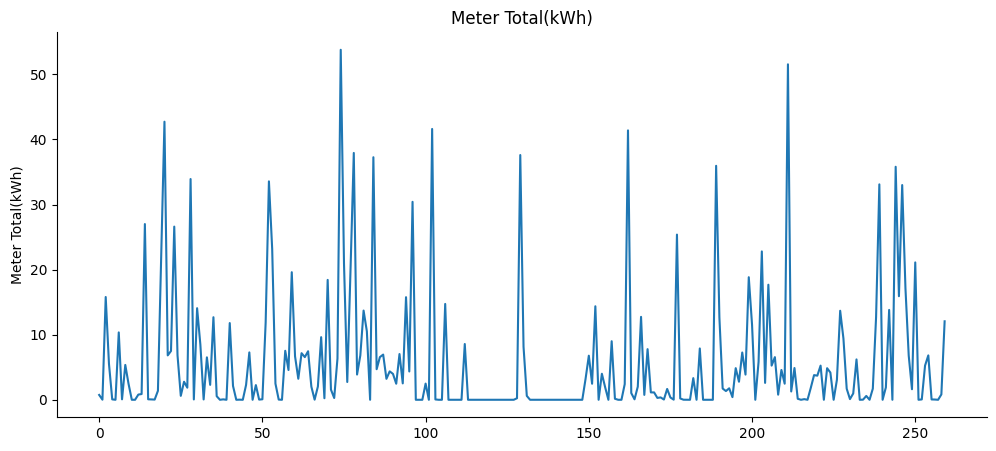

In [156]:
#Plotting Meter Total for each instance
df_adj['Meter Total(Wh)'].plot(kind='line', figsize=(12,5), title='Meter Total(kWh)')
plt.gca().spines[['top', 'right']].set_visible(False)

#Adding Label
plt.gca().set_ylabel('Meter Total(kWh)')

#plotting
plt.show()

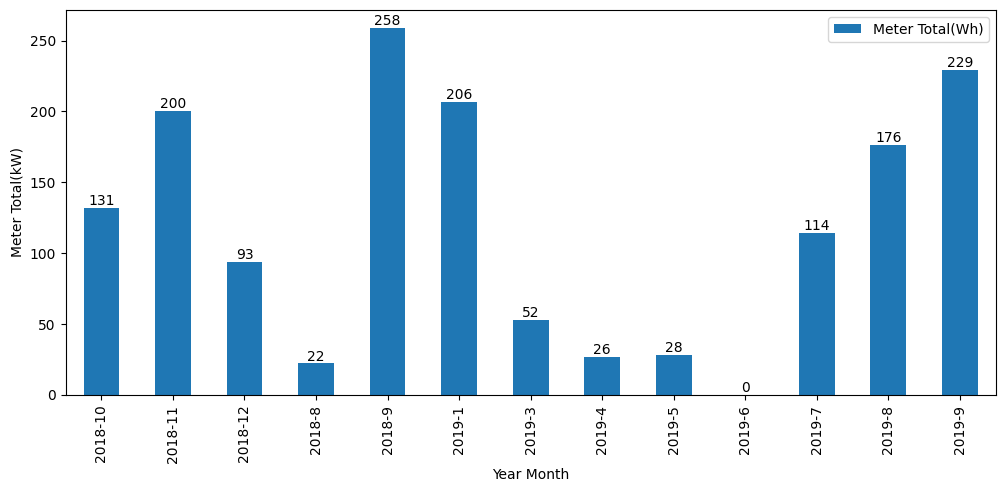

In [102]:
#Gropuing by 'year_month' and summing Meter total for each year_month
df_grouped = df_adj.groupby('year_month')['Meter Total(Wh)'].sum().reset_index()
df_grouped.plot(kind='bar', figsize=(12,5), x='year_month', y='Meter Total(Wh)')

#Adding labels
plt.xlabel('Year Month')
plt.ylabel('Meter Total(kW)')
plt.xticks(rotation=90)

# Adding the number of chargers above each bar
for i, v in enumerate(df_grouped['Meter Total(Wh)']):
    plt.text(i, v, str(int(v)), ha='center', va='bottom')

#plotting
plt.show()

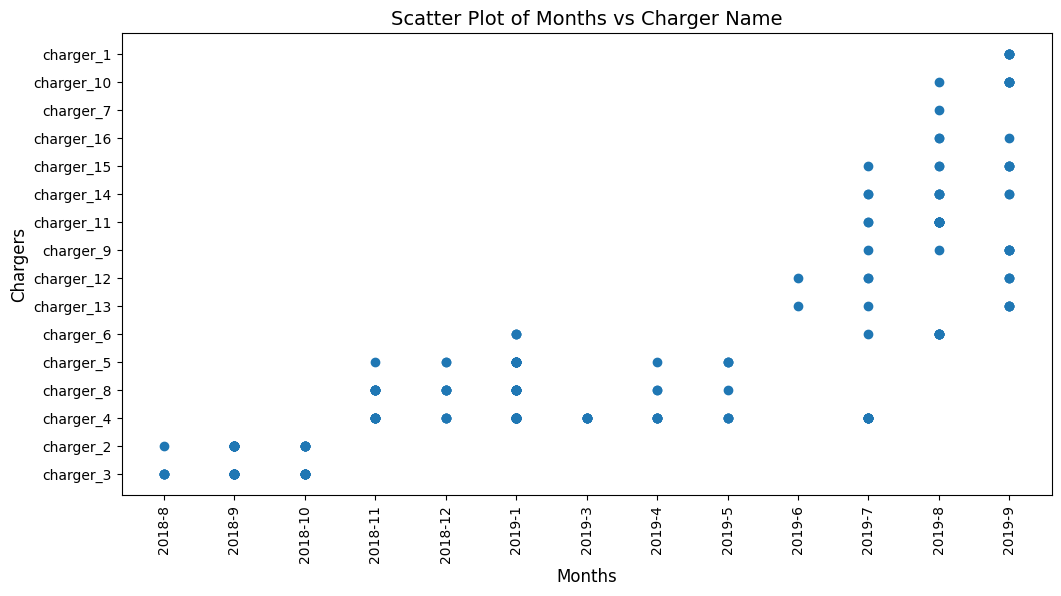

In [147]:
# Creating the scatter plot
start_time = df_adj['year_month']
charger_name = df_adj['Charger_name']
plt.figure(figsize=(12, 6))
plt.scatter(start_time, charger_name)

# Labeling the axes
plt.xlabel('Months', fontsize=12)
plt.ylabel('Chargers', fontsize=12)
plt.xticks(rotation=90)

# Adding a title
plt.title('Scatter Plot of Months vs Charger Name', fontsize=14)

# plotting
plt.show()

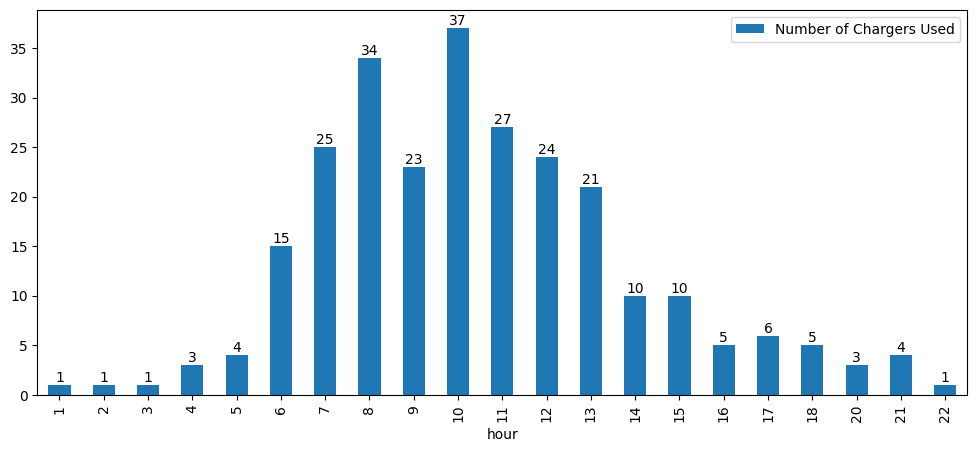

In [151]:
# Grouping by 'hour' and count the number of instances
df_sorted_grouped = df_adj.groupby('hour').size().reset_index(name='Number of Chargers Used')

# Plotting a bar chart
df_sorted_grouped.plot(kind='bar', figsize=(12,5), x='hour', y='Number of Chargers Used')

# Adding bar numbers
for i, v in enumerate(df_sorted_grouped['Number of Chargers Used']):
    plt.text(i, v, str(v), ha='center', va='bottom')

# plotting
plt.show()

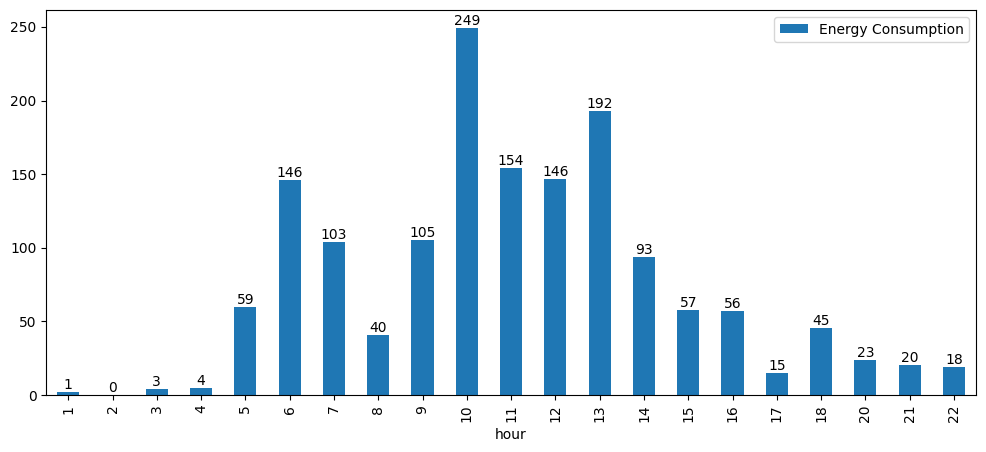

In [150]:
# Grouping by 'hour' and count the number of instances
df_sorted_grouped = df_adj.groupby('hour')['Meter Total(Wh)'].sum().reset_index(name='Energy Consumption')

# Plotting a bar chart
df_sorted_grouped.plot(kind='bar', figsize=(12,5), x='hour', y='Energy Consumption')

# Adding bar numbers
for i, v in enumerate(df_sorted_grouped['Energy Consumption']):
    plt.text(i, v, str(int(v)), ha='center', va='bottom')

# Showing the plot
plt.show()

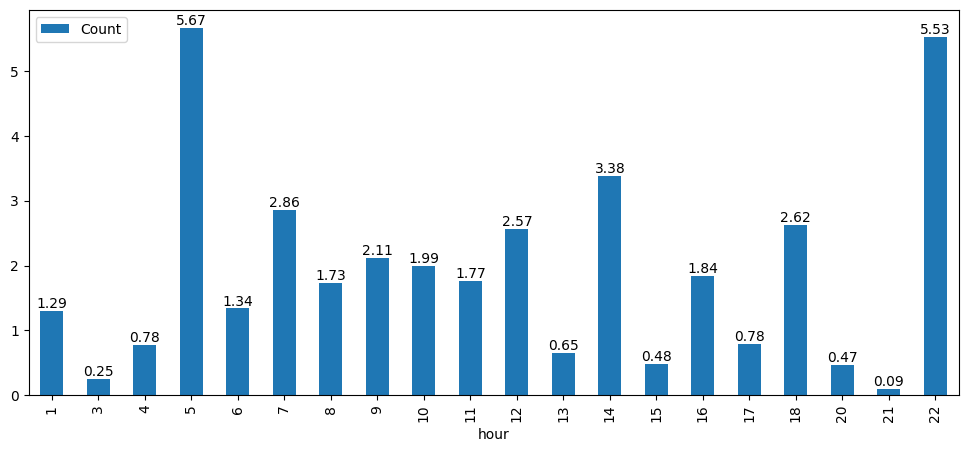

In [126]:
# Grouping by 'hour' and count the number of instances
df_temp = df_adj.copy()

#dropping rows with null values, Meter Total and Duration both are 0
df_temp.dropna(inplace=True)

#I am assuming that zero charging means that the charger and car were not compatible, or there was some fault with the METER of the charger
zero_charging = df_temp[df_temp['Meter Total(Wh)'] == 0]

#droppping the above rows from the new dataframe
df_temp.drop(zero_charging.index, inplace=True)
df_temp.reset_index(drop=True, inplace=True)
df_temp.shape

df_sorted_grouped = df_temp.groupby('hour')['Meter Speed'].mean().reset_index(name='Count')

# Ploting a bar chart
df_sorted_grouped.plot(kind='bar', figsize=(12,5), x='hour', y='Count')

# Adding bar numbers
for i, v in enumerate(df_sorted_grouped['Count']):
    plt.text(i, v, str(round(v,2)), ha='center', va='bottom')

# Showing the plot
plt.show()

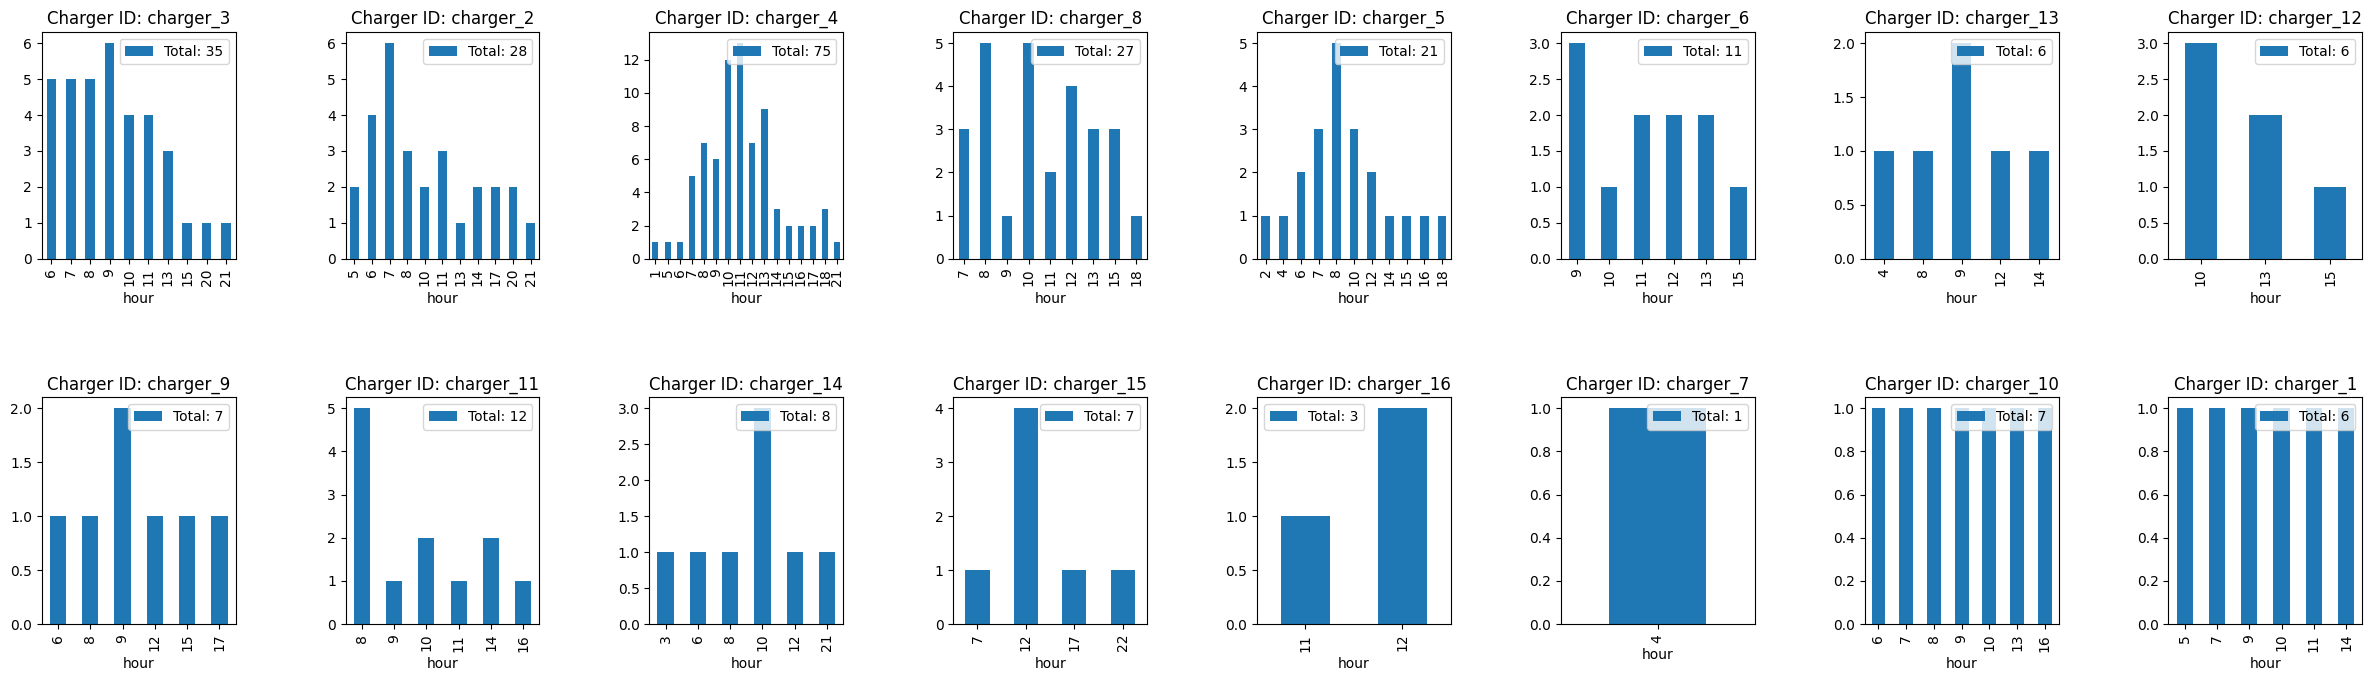

In [127]:
# Defineing the number of rows and columns for the subplot grid
nrows = 2
ncols = 8

# Createing a figure and a set of subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 8))

# Flattening the axes object
axes = axes.flat

# Iterating over unique charger IDs and create bar charts
charger_ids = df_adj['Charger_name'].unique()
for i, charger_id in enumerate(charger_ids):

    df_charger = df_adj[df_adj['Charger_name'] == charger_id]
    df_charger_grouped = df_charger.groupby('hour').size().reset_index(name='Count')
    total_count = df_charger_grouped['Count'].sum()
    df_charger_grouped.plot(kind='bar', x='hour', y='Count', ax=axes[i], title=f'Charger ID: {charger_id}')

    # Adding total count as a legend
    axes[i].legend([f'Total: {total_count}'])

# Adjusting spacing between subplots
plt.tight_layout(pad=5.0)

# Showing the plot
plt.show()

<ipython-input-179-2d5637ad558e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_adj['Meter Total(Wh)'], kde=True, kde_kws={'color': 'blue'}, color='grey')


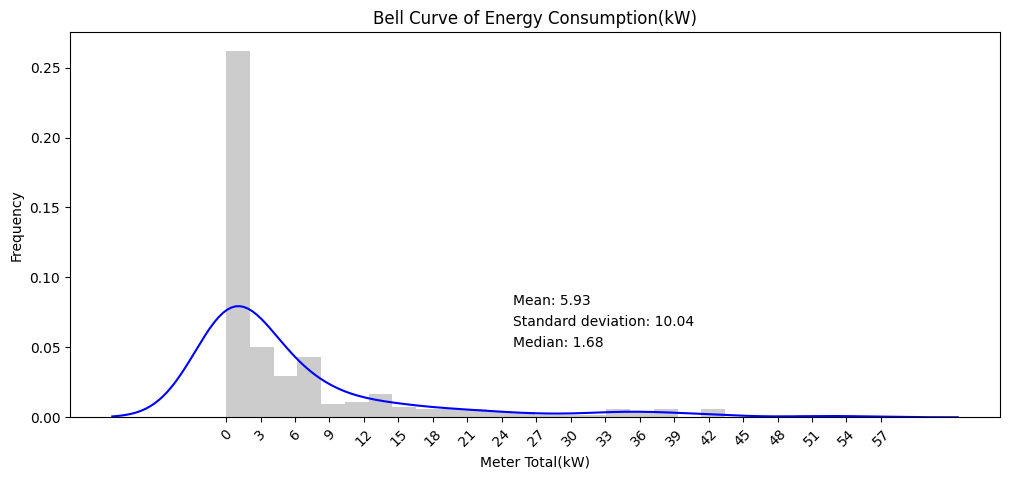

In [179]:
#Setting the size of the plot
plt.figure( figsize=(12,5))
# Creating the bell curve
sns.distplot(df_adj['Meter Total(Wh)'], kde=True, kde_kws={'color': 'blue'}, color='grey')

# Calculate the mean, standard deviation, and median
mean = statistics.mean(df_adj['Meter Total(Wh)'])
stddev = statistics.stdev(df_adj['Meter Total(Wh)'])
median = statistics.median(df_adj['Meter Total(Wh)'])

# Print the statistics on the plot
plt.text(25, 0.08, f"Mean: {mean:.2f}", color='black')
plt.text(25, 0.065, f"Standard deviation: {stddev:.2f}", color='black')
plt.text(25, 0.05, f"Median: {median:.2f}", color='black')

# Set xticks interval to 10
plt.xticks(range(0, 60, 3))
plt.xticks(rotation=45)


# Adding labels and title
plt.xlabel('Meter Total(kW)')
plt.ylabel('Frequency')
plt.title('Bell Curve of Energy Consumption(kW)')

#plotting
plt.show()

<ipython-input-152-db716d7864b9>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_adj['Meter Start (Wh)'], kde=True, kde_kws={'color': 'blue'}, color='grey')


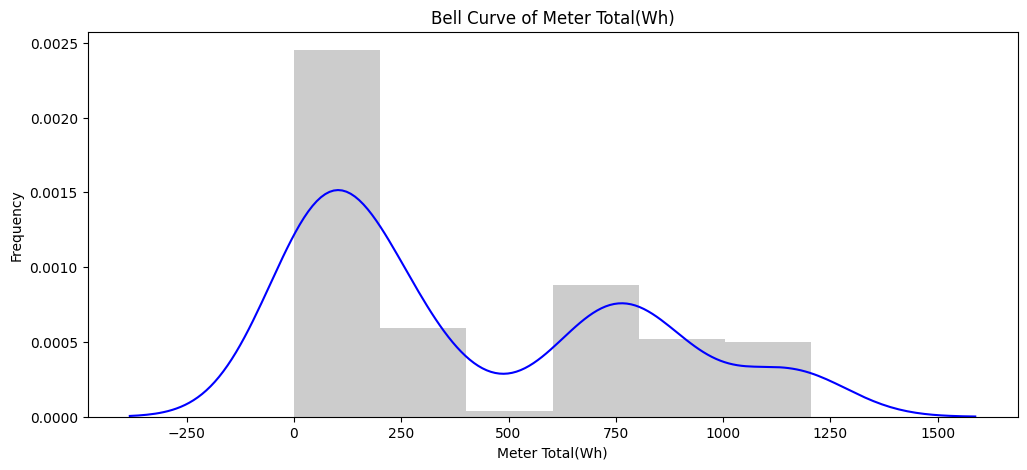

In [152]:
#setting the size of the plot
plt.figure( figsize=(12,5))

# Creating the bell curve
sns.distplot(df_adj['Meter Start (Wh)'], kde=True, kde_kws={'color': 'blue'}, color='grey')

# Adding labels and title
plt.xlabel('Meter Total(Wh)')
plt.ylabel('Frequency')
plt.title('Bell Curve of Meter Total(Wh)')

# Showing the plot
plt.show()

<ipython-input-112-38cb8e9097ff>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_adj['Meter End(Wh)'], kde=True, kde_kws={'color': 'blue'}, color='grey')


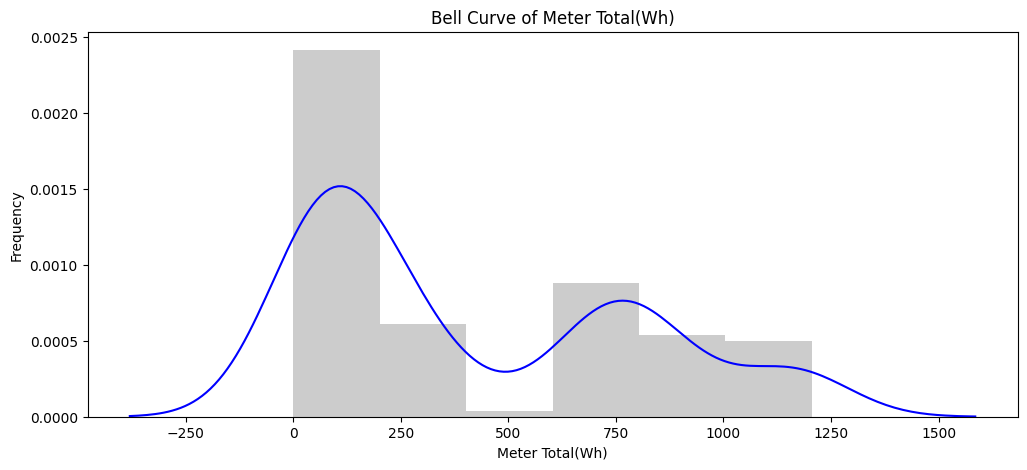

In [112]:
#setting the size of the plot
plt.figure( figsize=(12,5))

# Creating the bell curve
sns.distplot(df_adj['Meter End(Wh)'], kde=True, kde_kws={'color': 'blue'}, color='grey')

# Adding labels and title
plt.xlabel('Meter Total(Wh)')
plt.ylabel('Frequency')
plt.title('Bell Curve of Meter Total(Wh)')

#Plotting
plt.show()

<ipython-input-167-2a512af20779>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_adj['Total Duration (s)'], kde=True, kde_kws={'color': 'blue'}, color='grey')


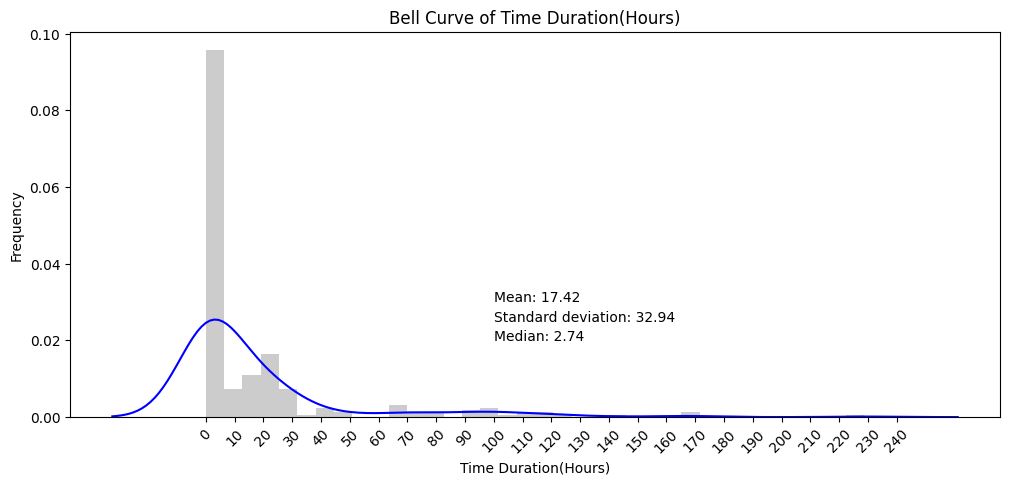

In [167]:
#Setting the size of the plot
plt.figure( figsize=(12,5))
# Creating the bell curve
sns.distplot(df_adj['Total Duration (s)'], kde=True, kde_kws={'color': 'blue'}, color='grey')

# Calculating the mean, standard deviation, and median
mean = statistics.mean(df_adj['Total Duration (s)'])
stddev = statistics.stdev(df_adj['Total Duration (s)'])
median = statistics.median(df_adj['Total Duration (s)'])

# Printing the statistics on the plot
plt.text(100, 0.03, f"Mean: {mean:.2f}", color='black')
plt.text(100, 0.025, f"Standard deviation: {stddev:.2f}", color='black')
plt.text(100, 0.02, f"Median: {median:.2f}", color='black')

# Setting xticks interval to 10
plt.xticks(range(0, 250, 10))
plt.xticks(rotation=45)

# Adding labels and title
plt.xlabel('Time Duration(Hours)')
plt.ylabel('Frequency')
plt.title('Bell Curve of Time Duration(Hours)')

#plotting
plt.show()

<ipython-input-164-731fddeac256>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_adj['Total Duration (s)'], kde=True, kde_kws={'color': 'blue'}, color='grey')


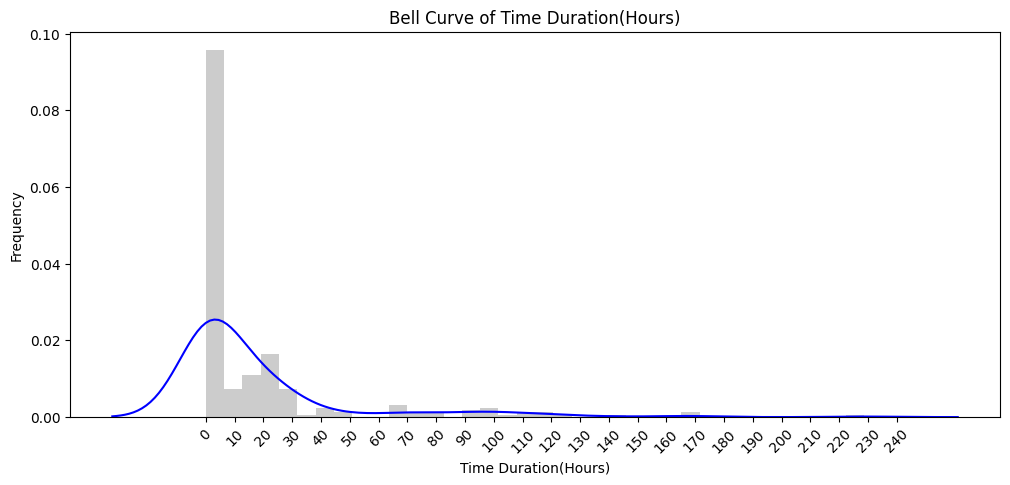

In [164]:
#Setting the size of the plot
plt.figure( figsize=(12,5))
# Creating the bell curve
sns.distplot(df_adj['Total Duration (s)'], kde=True, kde_kws={'color': 'blue'}, color='grey')

# Adding labels and title
plt.xlabel('Time Duration(Hours)')
plt.ylabel('Frequency')
plt.title('Bell Curve of Time Duration(Hours)')

# Setting xticks interval to 10
plt.xticks(range(0, 250, 10))
plt.xticks(rotation=45)
#plotting
plt.show()

# **UNWANTED CODE, MIGHT USE LATER**

In [392]:
def closest_value(number, array):

  # Calculating the absolute differences between the number and each element in the array
  differences = np.abs(array - number)

  # Finding the index of the element with the smallest absolute difference
  closest_index = np.argmin(differences)

  return df_speed['Charger_name'][closest_index]